# Lab: SVM (Solution)

## Setup

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC, SVR

from sklearn.datasets import load_iris, make_moons

## Introduction
In this exercise, we explore support vector machine (SVM) in conjuction with various kernels, including linear kernel, polynomial kernel and RBF kernel. Two datasets are used: **Iris flower dataset** and a built-in toy dataset created by *sklearn.datasets.make_moons*.

For classification purpose, we first solve binary classification problems, using linearly separable data (Iris dataset) and non linearly separable data (make_moons). We then move to multi-class classification tasks with Iris dataset.

The two datasets used in this exercise are described as follows:

### Iris flower dataset
**[Iris flower dataset](https://archive.ics.uci.edu/ml/datasets/iris)** was first introduced by Ronald Fisher as an example of linear discriminant analysis (LDA) in 1936. The dataset consists of 150 samples of three species: Iris setosa, Iris virginica and Iris versicolor, while each species contains exactly 50 samples. Each sample has 4 features: 

1. sepal length (cm)
2. sepal width (cm)
3. petal length (cm)
4. petal width (cm)

The labels of the dataset are:
0. Iris Setosa 
1. Iris Versicolour 
2. Iris Virginica

### make_moons
This is a built-in toy dataset, created by **[sklearn.datasets.make_moons](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html)**, which generates a 2d dataset (two interleaving half circles) for binary classification. This dataset is particularly challenging to linear classification algorithms as it is not linearly separable. In this exercise, we use this dataset to test non linear kernels.

## Linear SVM and nonlinear SVM

In this section, we test the performance of SVM using linear and non linear kernels, using make_moons dataset. We also explore the effects of different parameters (box constraints, degree of polynomial kernel, ...) in SVM algorithm. 

Please note that for simplicity, the dataset is not partitioned into training and test set, and no model selection is performed. These will be applied at the end of this exercise sheet.

In [10]:
def plot_moon(X, y):
    plt.scatter(X[y==0, 0], X[y==0, 1], c='b')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='g')

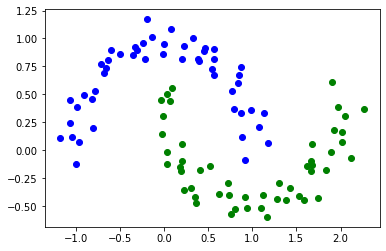

In [11]:
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)
plot_moon(X, y)
plt.show()

### Decision boundaries of SVM

In [12]:
def plot_decision_boundary(clf, model):
    
    # plot decision boundary
    X0, X1 = np.linspace(-3, 3, 100), np.linspace(-3, 3, 100)
    X0, X1 = np.meshgrid(X0, X1)
    
    X = np.c_[X0.ravel(), X1.ravel()]
    decision_boundary = clf.decision_function(X).reshape(X0.shape)
    plt.contourf(X0, X1, decision_boundary, cmap=plt.cm.GnBu, alpha=0.5)
    
    plt.title(model)

### 2. Decision boundaries vs. different parameters

How do decision boundaries change using different parameters? And according to your observation, how model complexity is related to parameters? Briefly write your answers below.

Hint: 

Hyperparameters in an SVM model determine the trade-off between error and complexity. For example, larger C gives smaller margin, while smaller C prefers larger margin with possibly more misclassified points.

### 3. Decision boundaries vs. differnt algorithms
We have explored how kernels and parameters affect the decision boundaries. Now please plot the decision boundaries of logistic regression and RBF SVM. What can you conclude?

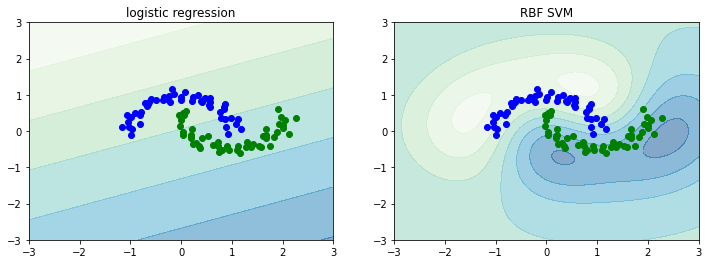

In [13]:
# solution

from sklearn.linear_model import LogisticRegression

# logistic regression
lr = LogisticRegression(solver='lbfgs')
lr.fit(X, y)

# rbf svm
svm = SVC(kernel='rbf', gamma='auto')
svm.fit(X, y)

# plot decision boundaries
plt.figure(figsize=(12, 4))

plt.subplot(121)
plot_decision_boundary(lr, 'logistic regression')
plot_moon(X, y)

plt.subplot(122)
plot_decision_boundary(svm, 'RBF SVM')
plot_moon(X, y)


plt.show()

In [14]:
predict_test = lr.predict(X)  # test
accuracy_score(y, predict_test)

0.87

In [15]:
predict_test = svm.predict(X)  # test
accuracy_score(y, predict_test)

0.93

### Classification accuracy
### 1. Train error vs. test error

In [16]:
def plot_accuracy(gammas, accuracy_dict):
    for label, accuracy in accuracy_dict.items():
        plt.plot(np.log2(gammas), accuracy, label=label)

    # add labels for x and y axis
    plt.xlabel(r'$log_2(\gamma)$')
    plt.ylabel('classification accuracy')
    plt.legend()
    
    plt.show()

In [17]:
# create a larger dataset with higher noise level for this exercise
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

Increasing
gamma makes the bell-shape curve narrower, and as a
result each instance’s range of influence is smaller: the decision boundary ends up
being more irregular, wiggling around individual instances. Conversely, a small gamma
value makes the bell-shaped curve wider, so instances have a larger range of influ‐
ence, and the decision boundary ends up smoother. So γ acts like a regularization
hyperparameter: if your model is overfitting, you should reduce it, and if it is under‐
fitting, you should increase it (similar to the C hyperparameter)

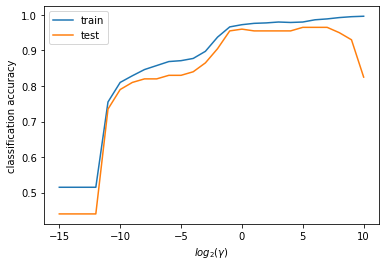

In [18]:
gammas = np.power(2, np.linspace(-15, 10, 26))

accuracy_train, accuracy_test = [], []
for gamma in gammas:
    svm = SVC(kernel='rbf', gamma=gamma)
    svm.fit(X_train, y_train)
    
    predict_train = svm.predict(X_train)  # train
    predict_test = svm.predict(X_test)  # test
    
    accuracy_train.append(accuracy_score(y_train, predict_train))
    accuracy_test.append(accuracy_score(y_test, predict_test))

# plot train and test accuracy
plot_accuracy(gammas, {'train': accuracy_train, 'test': accuracy_test})

### 2. Train error, validation error and test error
In the previous section, we have compared train and test accuracies under different parameters, what do you observe? How do they change?

In this section, please compute validation accuracy and compare it with train and test accuracy.

/home/lisanka/anaconda3/envs/ml2021/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


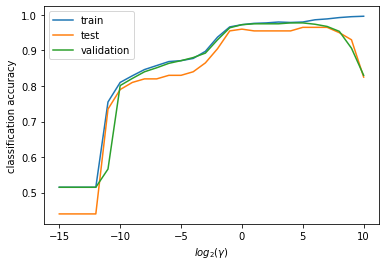

In [19]:
# solution

kf = KFold(n_splits=5, random_state=42)  # 5-fold cross validation

gammas = np.power(2, np.linspace(-15, 10, 26))

accuracy_validation = np.empty((5, len(gammas)))
for k, (index_train, index_validation) in enumerate(kf.split(X_train)):
    
    X_small_train, X_validation = X_train[index_train, :], X_train[index_validation, :]
    y_small_train, y_validation = y_train[index_train], y_train[index_validation]

    # compute classification accuracy on validation set
    # solution

    for l, gamma in enumerate(gammas):
        
        svm = SVC(kernel='rbf', gamma=gamma)
        svm.fit(X_small_train, y_small_train)
        
        predict_validation = svm.predict(X_validation)  # validation
        accuracy_validation[k, l] = accuracy_score(y_validation, predict_validation)    
    
# compute mean validation accuracy for 5 folds
# solution
accuracy_validation = np.mean(accuracy_validation, axis=0)

# plot the mean validation accuracy with your train and test accuracy
# what can you conclude?
# solution
plot_accuracy(gammas, {'train': accuracy_train, 
                       'test': accuracy_test,
                       'validation': accuracy_validation})

### 3. Decision boundary vs. classification accuracy
Plot decision boundaries for: $\gamma = 2^{-15}, \gamma = 2^5$ and $\gamma = 2^{10}$. How does decision boundary change as $\gamma$ changes? How about the model complexity? Recall the classification accuracy under these $\gamma$ values, what is the relationship between classification accuracy and decision boundary?

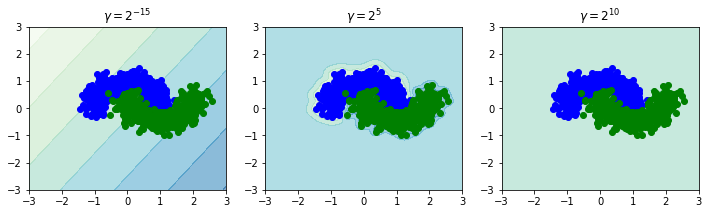

In [20]:
# solution

# gamma = 2**-15
svm1 = SVC(kernel='rbf', gamma=2**-15)
svm1.fit(X, y)

# gamma = 2**5
svm2 = SVC(kernel='rbf', gamma=2**5)
svm2.fit(X, y)

# gamma = 2**10
svm3 = SVC(kernel='rbf', gamma=2**10)
svm3.fit(X, y)

# plot decision boundaries
plt.figure(figsize=(12, 3))

plt.subplot(131)
plot_decision_boundary(svm1, r'$\gamma = 2^{-15}$')
plot_moon(X, y)

plt.subplot(132)
plot_decision_boundary(svm2, r'$\gamma = 2^5$')
plot_moon(X, y)

plt.subplot(133)
plot_decision_boundary(svm3, r'$\gamma = 2^{10}$')
plot_moon(X, y)

plt.show()

In [21]:
predict_test = svm1.predict(X)  # test
accuracy_score(y, predict_test)

0.796

In [22]:
predict_test = svm2.predict(X)  # test
accuracy_score(y, predict_test)

0.979

In [23]:
predict_test = svm3.predict(X)  # test
accuracy_score(y, predict_test)

0.997

## Multiclass classfication

So far, we have only explored binary classification problems. In this section, we will extend from binary classification to multiclass classification problems, using the 3-class Iris flower dataset.

All classification algorithms in *sklearn* allow multiclass classifcation, so such problems can be solved by simply passing data and labels to the modules. Some algorithms solve multiclass classification problems using a one-versus-one strategy, while some use a one-versus-all strategy. Please refer to [multiclass and multilabel algorithms](http://scikit-learn.org/stable/modules/multiclass.html).

Besides, one can implement their own solutions with [OneVsRestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier) and [OneVsOneClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html#sklearn.multiclass.OneVsOneClassifier).

In [24]:
def plot_predictions(X, clf, model):

    # plot decision boundary
    X0, X1 = np.linspace(4, 8, 100), np.linspace(1.5, 5, 100)
    X0, X1 = np.meshgrid(X0, X1)
    XX = np.c_[X0.ravel(), X1.ravel()]
    prediction = clf.predict(XX).reshape(X0.shape)
    plt.contourf(X0, X1, prediction, cmap=plt.cm.GnBu, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.GnBu, edgecolors='k')

    plt.title(model)


### Compute classification accuracy
Now please compute and plot train, test and validation accuracy over a range of paramters as what we did before.

/home/lisanka/anaconda3/envs/ml2021/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


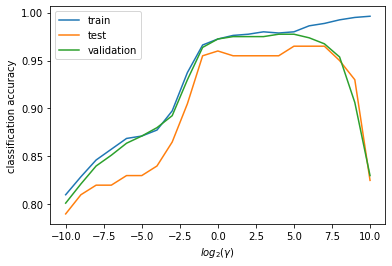

In [25]:
# solution

gammas = np.power(2, np.linspace(-10, 10, 21))

kf = KFold(n_splits=5, random_state=42)  # 5-fold cross validation
kf.split(X_train)

# validation accuracy
accuracy_validation = np.empty((5, len(gammas)))
for k, (index_train, index_validation) in enumerate(kf.split(X_train)):
    X_small_train, X_validation = X_train[index_train, :], X_train[index_validation, :]
    y_small_train, y_validation = y_train[index_train], y_train[index_validation]

    for l, gamma in enumerate(gammas):
        svm = SVC(kernel='rbf', gamma=gamma)
        svm.fit(X_small_train, y_small_train)
        
        predict_validation = svm.predict(X_validation)  # validation
        accuracy_validation[k, l] = accuracy_score(y_validation, predict_validation)    
    
accuracy_validation = np.mean(accuracy_validation, axis=0)

# train and test accuracy
accuracy_train, accuracy_test = [], []
for gamma in gammas:
    svm = SVC(kernel='rbf', gamma=gamma)
    svm.fit(X_train, y_train)

    predict_train = svm.predict(X_train)
    accuracy_train.append(accuracy_score(y_train, predict_train))

    predict_test = svm.predict(X_test)
    accuracy_test.append(accuracy_score(y_test, predict_test))

# plot the mean validation accuracy, train and test accuracy
plot_accuracy(gammas, {'train': accuracy_train, 
                       'test': accuracy_test,
                       'validation': accuracy_validation})

Plot decision boundaries for the parameters that:

1. gives maximum training accuracy
2. gives maximum validation accuracy
3. gives maximum test accuracy

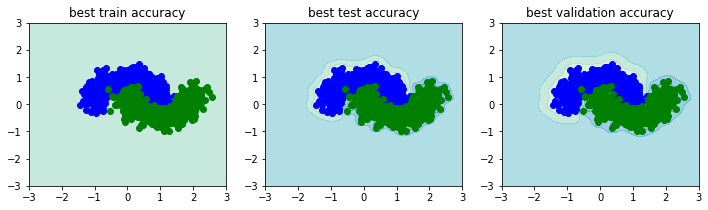

In [26]:
# solution

# train
plt.figure(figsize=(12, 3))
plt.subplot(131)
best_train = gammas[np.argmax(accuracy_train)]
svm = SVC(gamma=best_train)
svm.fit(X, y)
plot_decision_boundary(svm, 'best train accuracy')
plot_moon(X, y)

# test
plt.subplot(132)
best_test = gammas[np.argmax(accuracy_test)]
svm = SVC(gamma=best_test)
svm.fit(X, y)
plot_decision_boundary(svm, 'best test accuracy')
plot_moon(X, y)

# validation
plt.subplot(133)
best_validation = gammas[np.argmax(accuracy_validation)]
svm = SVC(gamma=best_validation)
svm.fit(X, y)
plot_decision_boundary(svm, 'best validation accuracy')
plot_moon(X, y)

plt.show()

Let us have a closer look at the decision boundaries for test data only, using the optimal parameters that maximize train, test and validation accuracies.

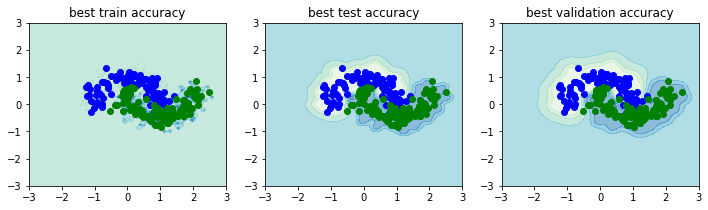

In [27]:
# train
plt.figure(figsize=(12, 3))
plt.subplot(131)
best_train = gammas[np.argmax(accuracy_train)]
svm = SVC(gamma=best_train)
svm.fit(X_train, y_train)
plot_decision_boundary(svm, 'best train accuracy')
plot_moon(X_test, y_test)

# test
plt.subplot(132)
best_test = gammas[np.argmax(accuracy_test)]
svm = SVC(gamma=best_test)
svm.fit(X_train, y_train)
plot_decision_boundary(svm, 'best test accuracy')
plot_moon(X_test, y_test)

# validation
plt.subplot(133)
best_validation = gammas[np.argmax(accuracy_validation)]
svm = SVC(gamma=best_validation)
svm.fit(X_train, y_train)
plot_decision_boundary(svm, 'best validation accuracy')
plot_moon(X_test, y_test)

plt.show()

## Exercise

### Compare SVM with other algorithms
Compare classification algorithms introduced in previous lectures, including Naive Bayes, logistic regression, LDA and QDA, with SVM using various kernels. Apply these algorithms to the Iris dataset and report their performances.

Please use **cross validation** to select optimal parameters. *sklearn* provides a number of cross validation methods. Some algorithms have implementations for cross validation purpose, for example, there are two implementations for logistic regression: [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and [LogisticRegressionCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html), while the latter performs a k-fold cross validation.

Additionally, cross validation can be implemented by other modules, including [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) and [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). For more methods please refer to the [model_selection](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) module.

In this exercise, an example of logistic regression in conjunction of *sklearn.model_selection.GridSearchCV* has been given. You can choose to use *GridSearchCV* as shown in the example, or use other methods you prefer.

#### Load data

In [1]:
import pandas as pd
data = pd.read_csv('4_pima-indians-diabetes_partial.csv', header=None)

In [2]:
data.columns = ["PlGlcConc",
                "SerIns", "BMI","DiPedFunc", "Age", "DiabetesStatus"]

In [3]:
#data cleansing
mean_PlGlcConc = data['PlGlcConc'].mean()
data['PlGlcConc'] = data['PlGlcConc'].replace(to_replace=0, value=mean_PlGlcConc)

mean_BMI = data['BMI'].mean()
data['BMI'] = data['BMI'].replace(to_replace=0, value=mean_BMI)

#### Split the data into training and test set

In [28]:
# extract labels from the dataset
X, y = data.drop("DiabetesStatus", axis=1), data["DiabetesStatus"].copy()

# split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

#### Logistic regression

In [48]:
from sklearn.linear_model import LogisticRegression
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # please note the lines above is used for silent sklearn warnings
    # which is not necessary

    k = 5
    lr = GridSearchCV(estimator=LogisticRegression(penalty='l2'),
                       param_grid={'C': [0.1, 1, 10]},
                       cv=k)
    lr.fit(X_train, y_train)    
    y_lr = lr.predict(X_test)

#### K nearest neighbour

In [49]:
# solution

from sklearn.neighbors import KNeighborsClassifier

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    knn = GridSearchCV(estimator=KNeighborsClassifier(),
                       param_grid={'n_neighbors': [1, 3, 7]},
                       cv=k)
    knn.fit(X_train, y_train)
    y_knn = knn.predict(X_test)

#### SVM (linear kernel)

In [51]:
# solution

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    svm_linear = GridSearchCV(estimator=SVC(kernel='linear'),
                              param_grid={'gamma': [10**-5, 10**0, 10**5]},
                              cv=k)
    svm_linear.fit(X_train, y_train)
    y_svm_linear = svm_linear.predict(X_test)

#### SVM (polynomial kernel)

In [52]:
# solution

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    svm_poly = GridSearchCV(estimator=SVC(kernel='poly'),
                            param_grid={'degree': [2, 3]},
                            cv=k)
    svm_poly.fit(X_train, y_train)
    y_svm_poly = svm_poly.predict(X_test)

#### SVM (RBF kernel)

In [53]:
# solution

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    svm_rbf = GridSearchCV(estimator=SVC(kernel='rbf'),
                           param_grid={'gamma': [10**-5, 10**0, 10**5]},
                           cv=k)
    svm_rbf.fit(X_train, y_train)
    y_svm_rbf = svm_rbf.predict(X_test)

#### Compare 
Report your classification accuracy.

In [54]:
# solution
"""
for model, prediction in zip(['logistic regression', 'knn', 'lda', 
                              'linear svm', 'polynomial svm', 'rbf svm'],
                             [y_lr, y_knn, y_lda, y_svm_linear, y_svm_poly, y_svm_rbf]):
    print('%s: %.4f' % (model, accuracy_score(y_test, prediction)))
"""
for model, prediction in zip(['logistic regression', 'knn', 
                              'linear svm', 'polynomial svm', 'rbf svm'],
                             [y_lr, y_knn, y_svm_linear, y_svm_poly, y_svm_rbf]):
    print('%s: %.4f' % (model, accuracy_score(y_test, prediction)))

logistic regression: 0.7597
knn: 0.7273
linear svm: 0.7662
polynomial svm: 0.7338
rbf svm: 0.7208


# Building your first text classifier with Python


Now we will apply several classification algorithms on textual data. SVMs usually perform quite well on text data. 

We will also cover some basic natural language processing (NLP) concepts



In [2]:
import pandas as pd

bbc_data = pd.read_csv("bbc-text.csv")

bbc_data = bbc_data[['category', 'text']]

bbc_data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


<AxesSubplot:>

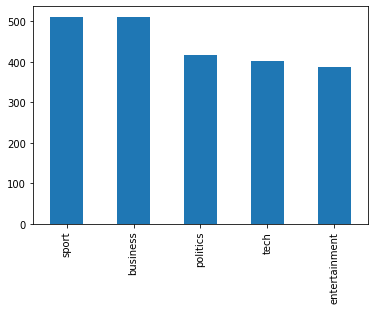

In [3]:
bbc_data['category'].value_counts().plot.bar()

As we can see it is a quite balanced dataset. With this sort of data, imbalanced in the dataset wouldn't be that problematic, but read this article if you are interestd in when imbalanced data can become a problem: https://medium.com/analytics-vidhya/what-is-balance-and-imbalance-dataset-89e8d7f46bc5

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.stem import WordNetLemmatizer, PorterStemmer
from collections import Counter
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn import svm, tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import (
    train_test_split, StratifiedShuffleSplit,
    cross_val_score)
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Baseline Classifier
Before we do anything with the data, lets split the data into train and test sets and run a multinomial naive bayes on the data. Naive Bayes is a popular algorithm, especially for NLP tasks. Check out this article where it's explained: https://medium.com/syncedreview/applying-multinomial-naive-bayes-to-nlp-problems-a-practical-explanation-4f5271768ebf

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    bbc_data['text'],
    bbc_data['category'],
    test_size=0.2,
    random_state=50,
)

#instantiate countvectorizer 
count_vector = CountVectorizer()

#fit training data
training_data = count_vector.fit_transform(X_train)

#transform test data
testing_data = count_vector.transform(X_test)

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

predictions = naive_bayes.predict(testing_data)


print('accuracy: {}'.format(accuracy_score(y_test, predictions)))



accuracy: 0.9730337078651685


Wow - thats pretty good. But maybe we were lucky and got an "easy" 20% test set. Let's use cross validation to exclude that possibility

In [6]:
X_whole = count_vector.fit_transform(bbc_data['text'])
le = LabelEncoder()
y_enc = le.fit_transform(bbc_data['category'])
scores = cross_val_score(naive_bayes, X_whole, y_enc, cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=100))
scores.mean()

0.9755056179775281

It seems like even without any preprocessing we can get very good results. It seems like the features (words) in each category are similar enough within the category and distinct enough from other categories. Out of curiostiry lets create some word clouds to visualise it

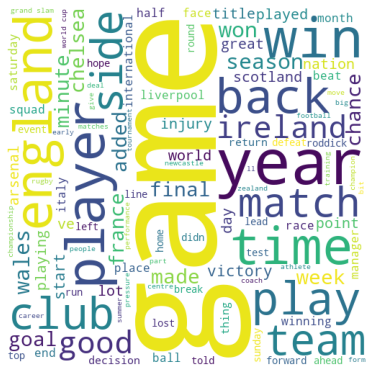

In [7]:
stop_words_file = 'SmartStoplist.txt'

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split())
        
      

sport_df = bbc_data[bbc_data['category'] == 'sport']
tech_df = bbc_data[bbc_data['category'] == 'tech']
pol_df = bbc_data[bbc_data['category'] == 'politics']

from wordcloud import WordCloud

bbc_words = '' 

for t in sport_df["text"]: 

    tokens = t.split() 
      
      
    bbc_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10,
                stopwords=stop_words).generate(bbc_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

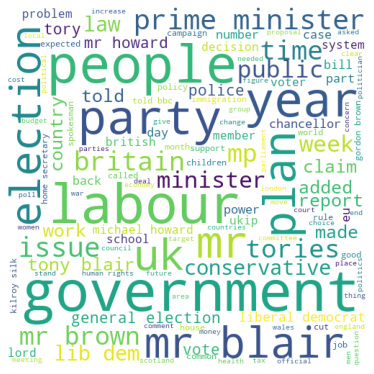

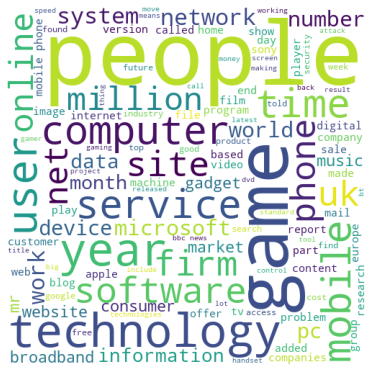

In [8]:
bbc_words = '' 

for t in pol_df["text"]: 
      
    tokens = t.split() 
      
      
    bbc_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10,
                stopwords=stop_words).generate(bbc_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

bbc_words = '' 

for t in tech_df["text"]: 

    
    tokens = t.split() 
      
      
    bbc_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10,
                stopwords=stop_words).generate(bbc_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Well yea, we can see that it is quite easy to distinguish political from tech news articles.
That's why it's usefull to always train a classifier with the raw data first. I have seen countless blog posts where people jump right in and do a lot of fancy preprocessing to get 95% of accuracy and when you train the classifier without preprocessing, its the same 95%

But let's still look at some other classifiers and compare their performance

## Decision Tree Classifier


DTC Accuracy Score ->  77.75280898876404
0.7898876404494383


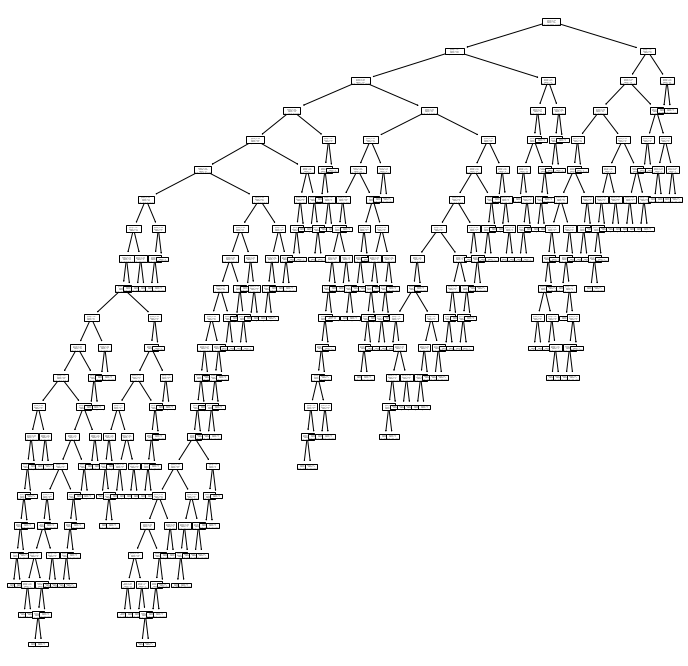

In [9]:
DTC = DecisionTreeClassifier(random_state=10, criterion="entropy")
DTC.fit(training_data,y_train)# predict the labels on validation dataset
predictions_DTC = DTC.predict(testing_data)# Use accuracy_score function to get the accuracy
print("DTC Accuracy Score -> ",accuracy_score(predictions_DTC, y_test)*100)

#cross validating
X_whole = count_vector.fit_transform(bbc_data['text'])
le = LabelEncoder()
y_enc = le.fit_transform(bbc_data['category'])
scores = cross_val_score(DTC, X_whole, y_enc, cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=100))
print(scores.mean())


fig, ax = plt.subplots(figsize=(12, 12))  # change size in case it is not readable 
tree.plot_tree(DTC, ax=ax)
plt.show()

In [ ]:
for i in range(3,30):

    print(i)
    DTC_2 = DecisionTreeClassifier(random_state=10, criterion="entropy", max_depth=i)
    DTC_2.fit(training_data,y_train)# predict the labels on validation dataset
    predictions_DTC_2 = DTC_2.predict(testing_data)# Use accuracy_score function to get the accuracy
    print("DTC Accuracy Score -> ",accuracy_score(predictions_DTC_2, y_test)*100)

You can see that accurace plateaus after 20 splits and that in fact 15 are enough

### Preprocess Data

In [10]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
from nltk import  word_tokenize
def preprocess(raw_text):
    
    #regular expression keeping only letters - more on them later
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = word_tokenize(letters_only_text.lower())
    

    cleaned_words = []
    lemmatizer = PorterStemmer() #play around with lemmatisers and stemmers
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #if using a lemmatiser, use lemmatize() instead of stem()
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

bbc_data['prep_text'] = bbc_data['text'].apply(preprocess)

bbc_data.head()

,category,text,prep_text
0,tech,tv future in the hands of viewers with home th...,tv futur hand viewer home theatr system plasma...
1,business,worldcom boss left books alone former worldc...,worldcom boss left book worldcom boss berni eb...
2,sport,tigers wary of farrell gamble leicester say ...,tiger wari farrel gambl leicest rush make bid ...
3,sport,yeading face newcastle in fa cup premiership s...,yead face newcastl fa cup premiership side new...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelv raid box offic ocean twelv crime c...


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    bbc_data['prep_text'],
    bbc_data['category'],
    test_size=0.2,
    random_state=50,
)

#instantiate countvectorizer 
count_vectorizer = CountVectorizer()

#fit training data
training_data = count_vectorizer.fit_transform(X_train)

#transform test data
testing_data = count_vectorizer.transform(X_test)

X_whole = count_vector.fit_transform(bbc_data['prep_text'])

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

predictions = naive_bayes.predict(testing_data)
print("NB Accuracy Score -> ",accuracy_score(predictions, y_test)*100)



NB Accuracy Score ->  97.52808988764045


### Decision Tree with preprocessed data

In [ ]:
for i in range(3,50):

    print(i)
    DTC_2 = DecisionTreeClassifier(random_state=10, criterion="entropy", max_depth=i)
    DTC_2.fit(training_data,y_train)# predict the labels on validation dataset
    predictions_DTC_2 = DTC_2.predict(testing_data)# Use accuracy_score function to get the accuracy
    print("DTC Accuracy Score -> ",accuracy_score(predictions_DTC_2, y_test)*100)

aha, our decision tree classifier got better with the preprocessed data

### KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier


KNN =KNeighborsClassifier(n_neighbors=4)
KNN.fit(training_data,y_train)# predict the labels on validation dataset
predictionsKNN = KNN.predict(testing_data)# Use accuracy_score function to get the accuracy
print("KNN Accuracy Score -> ",accuracy_score(predictionsKNN, y_test)*100)

X_whole = count_vectorizer.fit_transform(bbc_data['prep_text'])
le = LabelEncoder()
y_enc = le.fit_transform(bbc_data['category'])
scores = cross_val_score(KNN, X_whole, y_enc, cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=100))
print(scores.mean())

for i in range (2,30):
    KNN =KNeighborsClassifier(n_neighbors=i)
    KNN.fit(training_data,y_train)# predict the labels on validation dataset
    predictionsKNN = KNN.predict(testing_data)# Use accuracy_score function to get the accuracy
    print("KNN Accuracy Score for ", i," neighbours -> ",accuracy_score(predictionsKNN, y_test)*100)

KNN Accuracy Score ->  61.12359550561798
0.6080898876404495
KNN Accuracy Score for  2  neighbours ->  62.92134831460674
KNN Accuracy Score for  3  neighbours ->  60.449438202247194
KNN Accuracy Score for  4  neighbours ->  61.12359550561798
KNN Accuracy Score for  5  neighbours ->  56.17977528089888
KNN Accuracy Score for  6  neighbours ->  54.157303370786515
KNN Accuracy Score for  7  neighbours ->  51.91011235955057
KNN Accuracy Score for  8  neighbours ->  51.01123595505618
KNN Accuracy Score for  9  neighbours ->  49.21348314606742
KNN Accuracy Score for  10  neighbours ->  48.53932584269663
KNN Accuracy Score for  11  neighbours ->  47.86516853932584
KNN Accuracy Score for  12  neighbours ->  46.96629213483146
KNN Accuracy Score for  13  neighbours ->  46.29213483146067
KNN Accuracy Score for  14  neighbours ->  45.61797752808989
KNN Accuracy Score for  15  neighbours ->  43.59550561797752
KNN Accuracy Score for  16  neighbours ->  41.79775280898876
KNN Accuracy Score for  17  nei

## Logistic Regression

In [13]:
log_reg = LogisticRegression(multi_class="multinomial")   
log_reg.fit(training_data,y_train)# predict the labels on validation dataset
predictions_lr = log_reg.predict(testing_data)# Use accuracy_score function to get the accuracy
print("Logistic Regression Accuracy Score -> ",accuracy_score(predictions_lr, y_test)*100)

scores = cross_val_score(log_reg, X_whole, y_enc, cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=100))
scores.mean()

Logistic Regression Accuracy Score ->  96.40449438202248


0.9698876404494381

## Support Vector Machine

In [14]:
SVM = svm.SVC(kernel="linear")   #(kernel="poly", degree=3, coef0=1, C=5) (kernel="linear")
SVM.fit(training_data,y_train)# predict the labels on validation dataset
predictions_SVM = SVM.predict(testing_data)# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

scores = cross_val_score(SVM, X_whole, y_enc, cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=100))
scores.mean()

SVM Accuracy Score ->  95.28089887640449


0.9525842696629214

note, that if you train the SVM classifier with the raw data (not preprocessed), accuracy will remain the same

## (Vanilla) Neural Network

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub

X_train, X_test, y_train, y_test = train_test_split(
    bbc_data['prep_text'],
    bbc_data['category'],
    test_size=0.2,
    random_state=50,
)


max_words = 1000
#keras vectorizer
tokenize = keras.preprocessing.text.Tokenizer(num_words=max_words)

tokenize.fit_on_texts(X_train) # fit tokenizer to our training text data
X_train = tokenize.texts_to_matrix(X_train)
X_test = tokenize.texts_to_matrix(X_test)


#X_train[0]

encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)


#num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train)#, num_classes)
y_test = keras.utils.to_categorical(y_test)#, num_classes)

print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (1780, 1000)
x_test shape: (445, 1000)
y_train shape: (1780, 5)
y_test shape: (445, 5)


In [16]:
# This model trains very quickly and 2 epochs are already more than enough
# Training for more epochs will likely lead to overfitting on this dataset
# You can try tweaking these hyperparamaters when using this model with your own data
batch_size = 50
epochs = 2 

model = Sequential()
model.add(layers.Dense(512, input_shape=(max_words,)))
model.add(layers.Activation('relu'))
model.add(layers.Dense(5))   #number of classes
model.add(layers.Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               512512    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2565      
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0         
Total params: 515,077
Trainable params: 515,077
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/2
33/33 [==============================] - 0s 6ms/step - loss: 0.5478 - accuracy: 0.8689 - val_loss: 0.1450 - val_accuracy: 0.9663
Epoch 2/2
33/33 [==============================] - 0s 3ms/step - loss: 0.0676 - accuracy: 0.9894 - val_loss: 0.1001 - val_accuracy: 0.9607
